In [1]:
# takes 15s
# read acbl events sql table, cleanup, write to acbl_events_cleaned.pkl.

# Next steps:
# any training needed?

# Previous steps:
# acbl-download-details-to-json.ipynb
# acbl-json-to-sql.ipynb

# todo:
# more reports

In [2]:
import config
import pandas as pd
import pathlib
import pickle
import sqlalchemy
import mlBridgeLib

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# using pathlib to create sqlite path.
db_connection_string = 'sqlite:///'+acblPath.joinpath('acbl-details.sqlite').as_posix()
db_connection_string

'sqlite:///e:/bridge/data/acbl/acbl-details.sqlite'

In [6]:
def db_to_frames_dict(engine):
    meta = sqlalchemy.MetaData()
    meta.reflect(engine)
    tables = meta.tables.keys()
    cnx = engine.raw_connection()
    return {t: pd.read_sql(f'SELECT * FROM {t}', cnx ) for t in tables}

In [7]:
# create dict of sql SELECT statements.
sql_selects_d = {
    'events':'SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events'
    }

In [8]:
# takes 2m15s
dfs = {}
for k,v in sql_selects_d.items():
    engine = sqlalchemy.create_engine(db_connection_string) #, echo=True)
    with engine.connect() as con:
        if False:
            dfs = db_to_frames_dict(engine)
        else:
            print(f'{k}:{v}')
            dfs[k] = pd.read_sql(v, con)
    engine.dispose()

events:SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events


In [9]:
for k,v in dfs.items():
    display(k,v.head(),v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350160 entries, 0 to 350159
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              350160 non-null  int64  
 1   event_name            350160 non-null  object 
 2   club_name             350160 non-null  object 
 3   club_id_number        350160 non-null  int64  
 4   event_type            350160 non-null  object 
 5   rating                350160 non-null  int64  
 6   board_scoring_method  350160 non-null  object 
 7   stratification_type   350160 non-null  object 
 8   winner_type           350160 non-null  int64  
 9   club_class            350160 non-null  int64  
 10  tb_count              350160 non-null  float64
 11  club_session          350160 non-null  object 
 12  start_date            350160 non-null  object 
 13  end_date              350160 non-null  object 
 14  mpLimits              350160 non-null  object 
 15  

'events'

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/17/2020,02/17/2020,MP Limits: None,1
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/24/2020,02/24/2020,MP Limits: None,1
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,03/02/2020,03/02/2020,MP Limits: None,1
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,03/09/2020,03/09/2020,MP Limits: None/100,1
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,03/16/2020,03/16/2020,MP Limits: None,1


None

In [10]:
events_dtypes = {
    'event_id':'int64',
    'event_name':'string',
    'club_name':'string',
    'club_id_number':'int64',
    'event_type':'string',
    'rating':'int8',
    'board_scoring_method':'string',
    'stratification_type':'string',
    'winner_type':'int8',
    'club_class':'int8',
    'tb_count':'float32',
    'club_session':'string',
    'start_date':'datetime64[ns]',
    'end_date':'datetime64[ns]',
    'mpLimits':'string',
    'olExists':'boolean'
}
df_events = dfs['events']
df_events = df_events.astype(events_dtypes)
display(df_events.isna().sum(), df_events.info(), df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350160 entries, 0 to 350159
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_id              350160 non-null  int64         
 1   event_name            350160 non-null  string        
 2   club_name             350160 non-null  string        
 3   club_id_number        350160 non-null  int64         
 4   event_type            350160 non-null  string        
 5   rating                350160 non-null  int8          
 6   board_scoring_method  350160 non-null  string        
 7   stratification_type   350160 non-null  string        
 8   winner_type           350160 non-null  int8          
 9   club_class            350160 non-null  int8          
 10  tb_count              350160 non-null  float32       
 11  club_session          350160 non-null  string        
 12  start_date            350160 non-null  datetime64[ns]
 13 

event_id                0
event_name              0
club_name               0
club_id_number          0
event_type              0
rating                  0
board_scoring_method    0
stratification_type     0
winner_type             0
club_class              0
tb_count                0
club_session            0
start_date              0
end_date                0
mpLimits                0
olExists                0
dtype: int64

None

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [11]:
cols = df_events.columns
for col in cols:
    vc = df_events[col].value_counts()
    display(col,len(df_events[col]),len(vc),vc)

'event_id'

350160

350160

100961    1
76644     1
94167     1
90302     1
8925      1
87988     1
84279     1
82092     1
8166      1
78669     1
73808     1
57724     1
7380      1
72009     1
7107      1
69252     1
67573     1
6610      1
6077      1
59473     1
9587      1
96364     1
9964      1
100368    1
141724    1
         ..
321455    1
320755    1
320211    1
327796    1
329035    1
339031    1
329629    1
338280    1
338221    1
337751    1
337343    1
336429    1
335967    1
335345    1
335065    1
334799    1
334303    1
333487    1
333380    1
33301     1
332635    1
331256    1
330437    1
330169    1
88830     1
Name: event_id, Length: 350160, dtype: int64

'event_name'

350160

218528

Monday Afternoon Pairs                       9856
Open Pairs                                   9697
Wednesday Afternoon Pairs                    8561
Tuesday Afternoon Pairs                      7577
Thursday Afternoon Pairs                     7166
Friday Afternoon Pairs                       7060
Friday Morning Pairs                         3918
Monday Morning Pairs                         3695
Wednesday Morning Pairs                      3200
Event Name                                   3152
Monday Evening Pairs                         2965
Tuesday Morning Pairs                        2734
Tuesday Evening Pairs                        2723
Thursday Morning Pairs                       2391
Saturday Afternoon Pairs                     2230
Thursday Evening Pairs                       1820
Wednesday Evening Pairs                      1754
Sunday Afternoon Pairs                       1577
Stratified Open Pairs                        1108
Saturday Morning Pairs                        722


'club_name'

350160

3501

Sagamore at Shelter Rock            5027
Bridge Academy of North Dallas      3366
Duncan Bridge Center                3336
Gryphon II DBC                      3008
Honors                              2870
Ft Lauderdale Bridge Club           2536
OneWorld BOSTON                     2368
LA Bridge Assn                      2310
The Villages DBC                    2232
Duke City Bridge Club               2020
Bridge 21 DBC                       1976
Bridge Boardroom                    1926
Brunswick Bridge                    1910
St Louis Bridge Center              1904
Vanderbilt BC Of Nashville          1700
Vero Beach Bridge Center            1505
Palm Beach BC At St Catherine       1481
Edmonton Bridge Centre              1454
Bridge Center of St Paul            1418
Denver Metro Bridge Studio          1411
Westside Bridge Academy             1393
Fun And Games DBC                   1390
Chicago Duplicate Bridge            1364
Grand River Bridge Club             1342
Newtown Bridge C

'club_id_number'

350160

2465

266064    5037
260117    3906
263830    3336
248732    3008
232132    2870
217489    2744
221739    2670
108571    2537
267476    2390
277178    2368
166520    2142
262410    2023
103333    2020
239152    1982
275388    1976
239343    1926
272740    1789
105346    1700
267120    1648
218727    1595
225987    1587
206037    1558
267005    1527
199240    1515
100222    1481
          ... 
903518       1
254045       1
248781       1
248757       1
248096       1
276931       1
260844       1
276527       1
226811       1
220400       1
264804       1
265058       1
277251       1
212993       1
266999       1
197012       1
901025       1
253633       1
901405       1
901447       1
162131       1
270520       1
134007       1
902296       1
276139       1
Name: club_id_number, Length: 2465, dtype: int64

'event_type'

350160

2

PAIRS         350046
INDIVIDUAL       114
Name: event_type, dtype: Int64

'rating'

350160

53

1     244744
70     14336
68     13796
2      11424
14      6729
20      6143
30      6021
3       5637
74      5566
55      4674
43      4222
69      3977
72      3367
4       3334
73      3165
63      1910
12      1848
66      1772
7       1723
8       1155
71       862
75       537
0        468
33       397
32       284
       ...  
29       169
40       166
18       153
25       151
51       144
47        87
24        67
17        66
44        63
48        58
65        53
15        42
21        31
45        29
64        28
58        28
28        20
56        16
38        15
57        14
27         8
49         6
61         3
60         1
59         1
Name: rating, Length: 53, dtype: int64

'board_scoring_method'

350160

7

MATCH_POINTS    349210
BUTLER_IMPS        718
CROSS_IMPS         160
OTHER               52
IMPS                15
AGGREGATE            3
HYBRID               2
Name: board_scoring_method, dtype: Int64

'stratification_type'

350160

2

AVERAGE    219415
HIGHEST    130745
Name: stratification_type, dtype: Int64

'winner_type'

350160

2

2    210620
1    139540
Name: winner_type, dtype: int64

'club_class'

350160

4

4    314297
3     34419
2      1343
1       101
Name: club_class, dtype: int64

'tb_count'

350160

122

5.00     32300
6.00     31781
4.00     29946
7.00     29268
8.00     25918
3.00     25088
9.00     22465
10.00    18810
11.00    15512
12.00    12755
13.00    10357
14.00     8271
4.50      7753
3.50      7133
5.50      6783
15.00     6586
6.50      5638
16.00     5481
7.50      4651
17.00     4286
8.50      3618
18.00     3368
2.50      3325
9.50      2932
19.00     2693
         ...  
45.50        3
50.50        3
44.50        2
60.00        2
58.00        2
3.25         2
62.00        2
46.50        2
0.50         2
70.00        2
60.50        1
68.50        1
75.50        1
61.00        1
59.00        1
76.50        1
49.50        1
1.50         1
47.50        1
51.50        1
57.00        1
55.00        1
5.25         1
52.50        1
93.00        1
Name: tb_count, Length: 122, dtype: int64

'club_session'

350160

21

Monday Afternoon       37728
Wednesday Afternoon    33692
Tuesday Afternoon      31829
Thursday Afternoon     30958
Friday Afternoon       29255
Friday Morning         20745
Monday Morning         20084
Thursday Morning       18393
Tuesday Morning        18211
Wednesday Morning      18066
Saturday Afternoon     17264
Sunday Afternoon       14149
Tuesday Evening        11316
Monday Evening         11120
Saturday Morning       10462
Wednesday Evening       8736
Thursday Evening        8501
Sunday Morning          4268
Friday Evening          2711
Saturday Evening        1542
Sunday Evening          1130
Name: club_session, dtype: Int64

'start_date'

350160

1699

2020-02-10    1141
2020-03-02    1131
2020-02-03    1125
2020-02-24    1119
2020-03-09    1081
2020-02-17    1043
2020-01-27     985
2020-03-04     979
2020-02-19     978
2020-02-12     971
2020-02-25     961
2020-02-11     958
2020-01-06     949
2020-02-26     947
2020-02-05     944
2020-01-13     944
2020-02-18     939
2020-02-04     933
2020-03-11     932
2020-03-10     929
2020-03-03     921
2020-01-20     891
2021-07-26     884
2020-02-13     856
2020-01-28     854
              ... 
2015-09-10       1
2015-09-24       1
2015-10-29       1
2015-11-05       1
2015-11-12       1
2015-11-26       1
2015-12-03       1
2015-12-10       1
2015-12-17       1
2016-01-07       1
2016-02-04       1
2016-05-26       1
2016-02-11       1
2016-02-25       1
2016-03-03       1
2016-03-10       1
2016-03-17       1
2016-03-24       1
2016-04-07       1
2016-04-14       1
2016-04-21       1
2016-04-28       1
2016-05-05       1
2016-05-19       1
2018-06-20       1
Name: start_date, Length: 1699,

'end_date'

350160

1699

2020-02-10    1141
2020-03-02    1131
2020-02-03    1125
2020-02-24    1119
2020-03-09    1081
2020-02-17    1043
2020-01-27     985
2020-03-04     979
2020-02-19     978
2020-02-12     971
2020-02-25     961
2020-02-11     958
2020-01-06     949
2020-02-26     947
2020-02-05     944
2020-01-13     944
2020-02-18     939
2020-02-04     933
2020-03-11     932
2020-03-10     929
2020-03-03     921
2020-01-20     891
2021-07-26     884
2020-02-13     856
2020-01-28     854
              ... 
2015-09-10       1
2015-09-24       1
2015-10-29       1
2015-11-05       1
2015-11-12       1
2015-11-26       1
2015-12-03       1
2015-12-10       1
2015-12-17       1
2016-01-07       1
2016-02-04       1
2016-05-26       1
2016-02-11       1
2016-02-25       1
2016-03-03       1
2016-03-10       1
2016-03-17       1
2016-03-24       1
2016-04-07       1
2016-04-14       1
2016-04-21       1
2016-04-28       1
2016-05-05       1
2016-05-19       1
2018-06-20       1
Name: end_date, Length: 1699, d

'mpLimits'

350160

171975

MP Limits: None              21051
MP Limits: None/1500/500      7939
MP Limits: None/2000/750      7322
MP Limits: None/2500/500      5246
MP Limits: None/1000/500      4795
MP Limits: None/1000/300      4511
MP Limits: None/500/200       3542
MP Limits: None/2000/500      3526
MP Limits: None/200/50        3415
MP Limits: None/2000/1000     3398
MP Limits: None/1500/300      2985
MP Limits: None/2500/750      2880
MP Limits: None/500           2381
MP Limits: None/1500/750      2377
MP Limits: None/2500/1000     2358
MP Limits: None/500/300       1841
MP Limits: None/750/300       1823
MP Limits: None/300/100       1721
MP Limits: None/200           1617
MP Limits: None/500/100       1544
MP Limits: None/None/None     1423
MP Limits: None/1250/500      1358
MP Limits: 500/200/100        1346
MP Limits: None/300           1195
MP Limits: 500/300/100        1188
                             ...  
MP Limits: 751/392/296           1
MP Limits: None/3137/1022        1
MP Limits: 1201/612/

'olExists'

350160

2

True     182701
False    167459
Name: olExists, dtype: Int64

In [12]:
df_events.isna().sum()

event_id                0
event_name              0
club_name               0
club_id_number          0
event_type              0
rating                  0
board_scoring_method    0
stratification_type     0
winner_type             0
club_class              0
tb_count                0
club_session            0
start_date              0
end_date                0
mpLimits                0
olExists                0
dtype: int64

In [13]:
# drop non-PAIRS events
rows_to_drop = df_events['event_type'].ne('PAIRS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

350160

114

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
12403,329371,Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,2,MATCH_POINTS,HIGHEST,1,3,4.00,Sunday Afternoon,2021-06-13,2021-06-13,MP Limits: None/2000/750,False
12424,347272,Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,3.00,Sunday Afternoon,2021-07-11,2021-07-11,MP Limits: None/2000/750,False
12431,351874,F2F Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,2,MATCH_POINTS,HIGHEST,1,4,4.00,Sunday Afternoon,2021-07-18,2021-07-18,MP Limits: None/2000/750,False
12437,356446,F2F Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,63,MATCH_POINTS,HIGHEST,1,4,3.00,Sunday Afternoon,2021-07-25,2021-07-25,MP Limits: None/2000/750,False
12524,63788,Individual,Columbia Duplicate Bridge,107318,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,4.00,Sunday Afternoon,2019-12-29,2019-12-29,MP Limits: None/2000/750,False


350046

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [14]:
# drop non-MATCH_POINTS events
rows_to_drop = df_events['board_scoring_method'].ne('MATCH_POINTS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

350046

949

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
16,154265,#6844 Pairs Unit 456 - 18 Boards,Cariboo Bridge Club,100040,PAIRS,66,BUTLER_IMPS,HIGHEST,2,4,7.00,Sunday Evening,2020-06-21,2020-06-21,MP Limits: None/1167/786,False
267,136174,#566 **ARLINGTON Tx** 2:05 pm IMP Pairs,Arlington DBC Inc,100222,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,7.00,Friday Afternoon,2020-05-08,2020-05-08,MP Limits: None/2197/820,False
7082,31354,ACBL Instant Matchpoint,Duke City Bridge Club,103333,PAIRS,29,OTHER,HIGHEST,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: None/3500/1000,True
7083,31355,0-6K ACBL Instant Matchpo,Duke City Bridge Club,103333,PAIRS,29,OTHER,AVERAGE,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: 6000/1000/300,True
15275,131293,#9869 IMPs - Ft Lauderdale/Quick Tricks/Pompano,Ft Lauderdale Bridge Club,108571,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,8.00,Wednesday Evening,2020-04-22,2020-04-22,MP Limits: None/1047/427,False


349097

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [15]:
events_file = acblPath.joinpath('acbl_events_cleaned.pkl')
with open(events_file, 'wb') as f:
    pickle.dump(df_events, f)
print(f"Saved {events_file}: rows:{len(df_events)} size:{events_file.stat().st_size}")

Saved e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:349097 size:63690675


In [16]:
events_file = acblPath.joinpath('acbl_events_cleaned.pkl')
with open(events_file, 'rb') as f:
    df_events = pickle.load(f)
print(f"Loaded {events_file}: rows:{len(df_events)}")

Loaded e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:349097


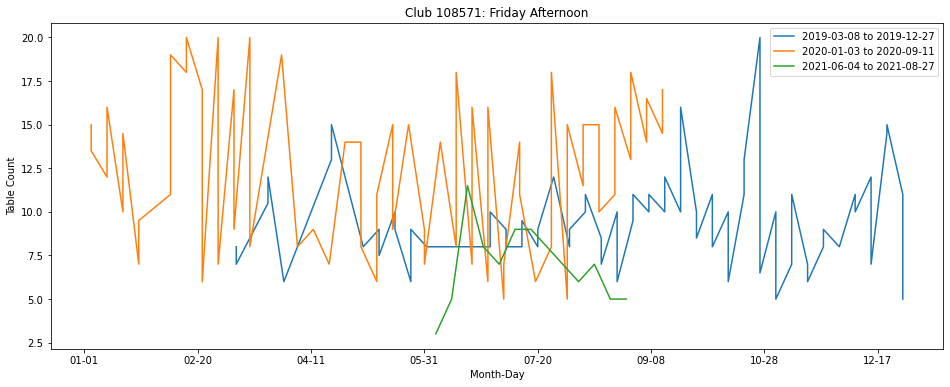

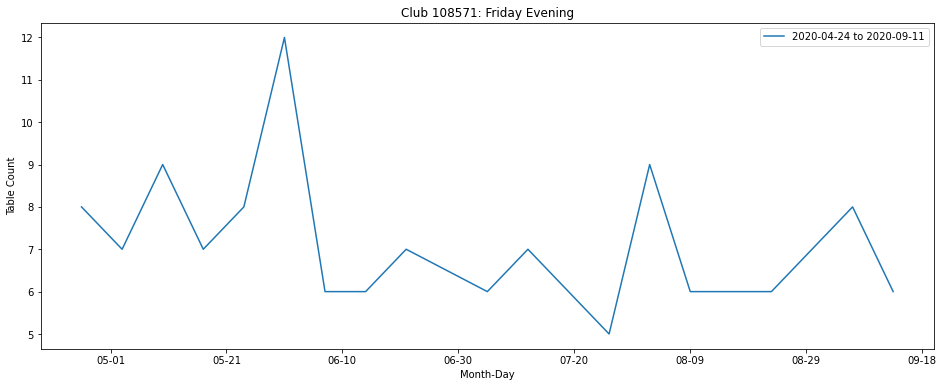

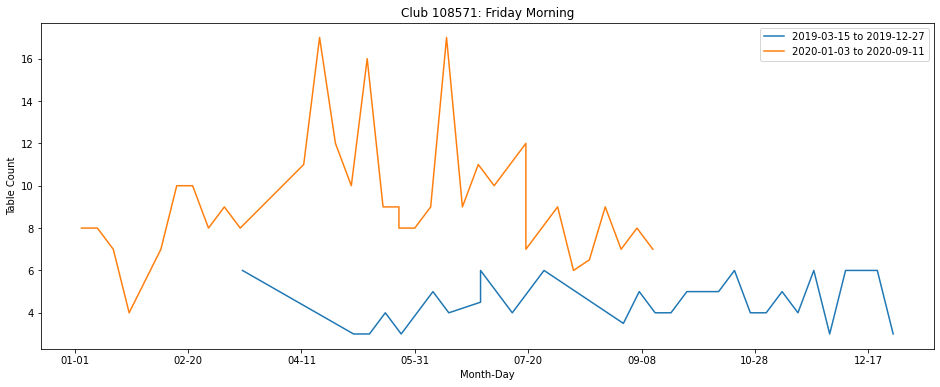

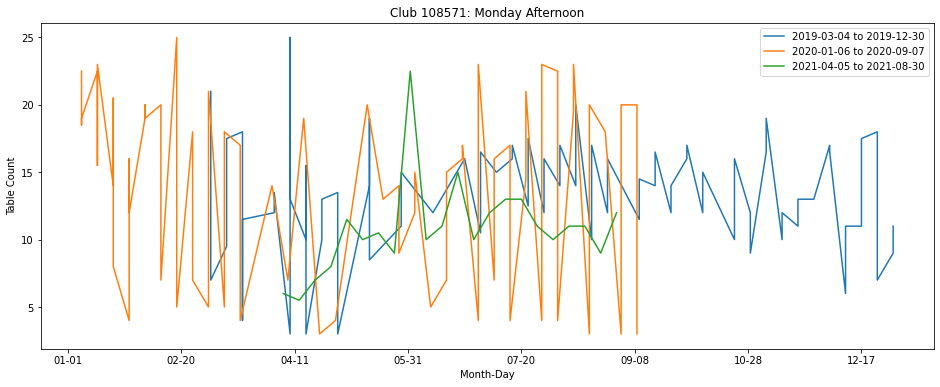

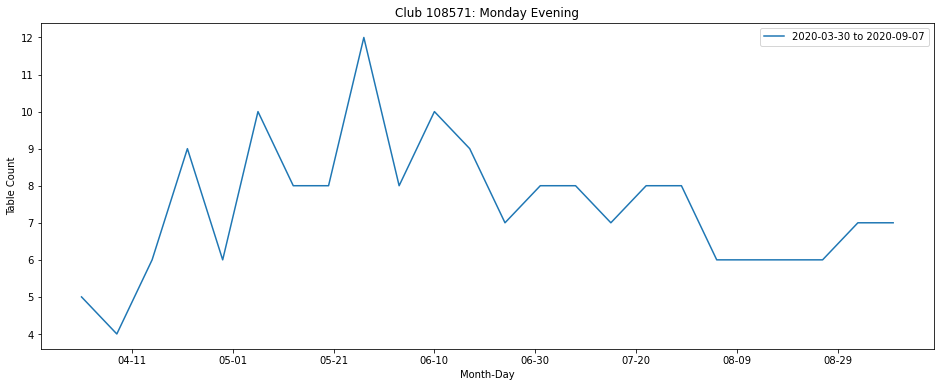

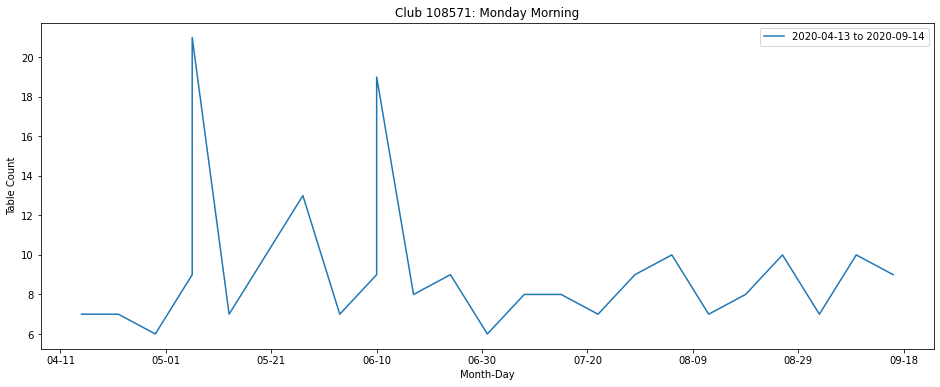

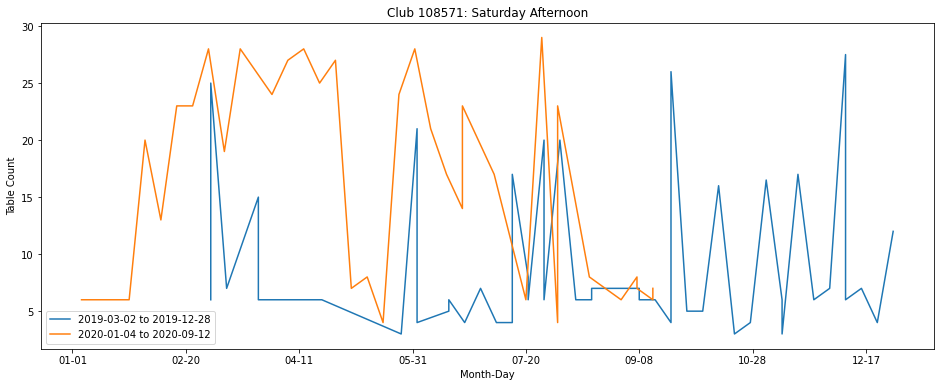

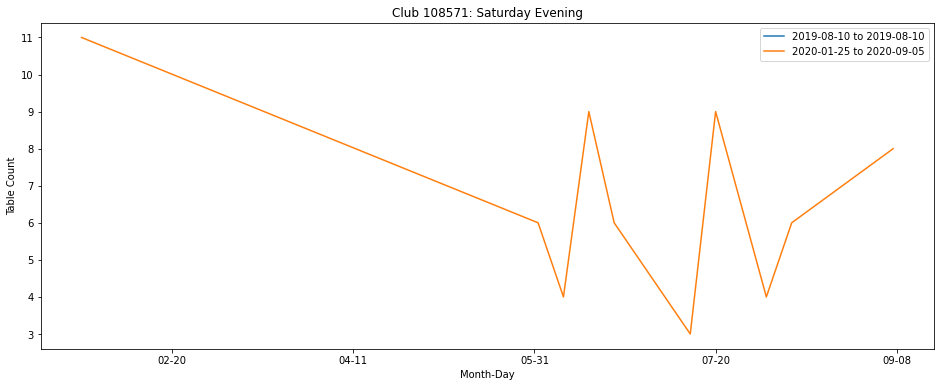

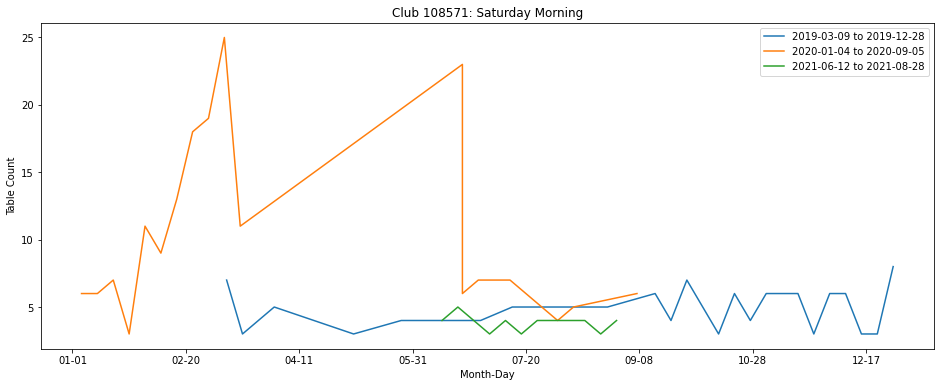

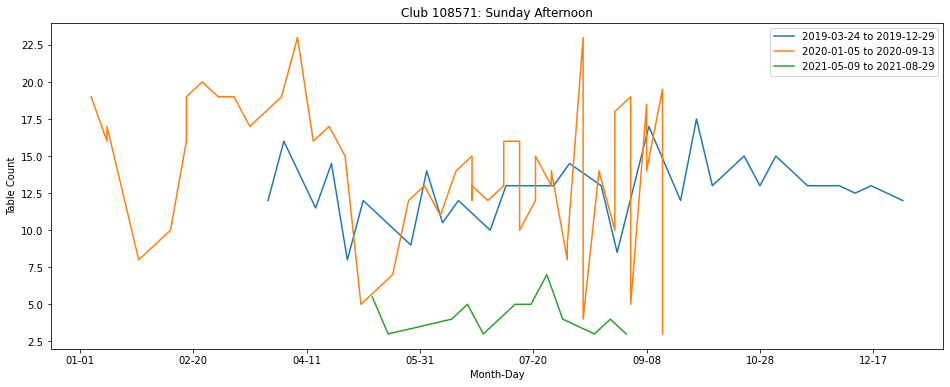

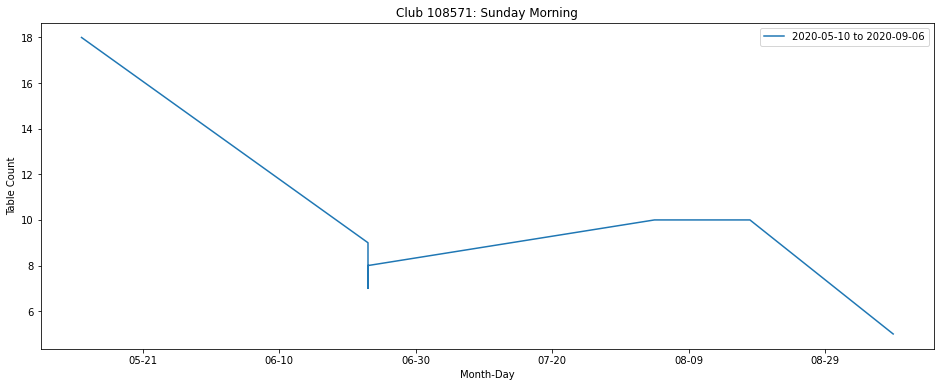

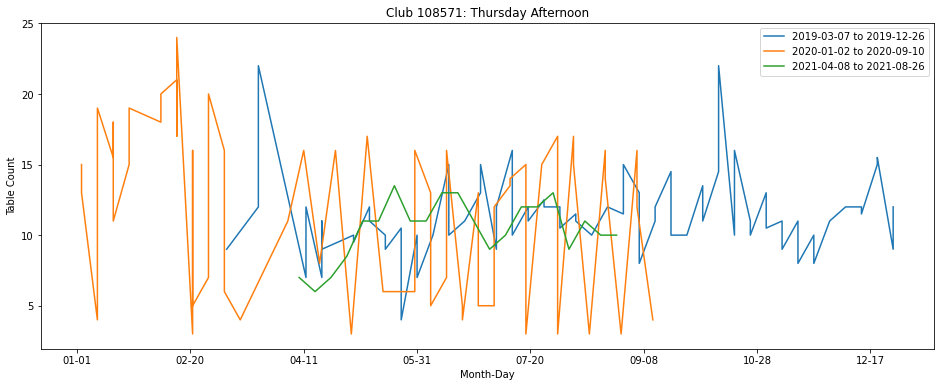

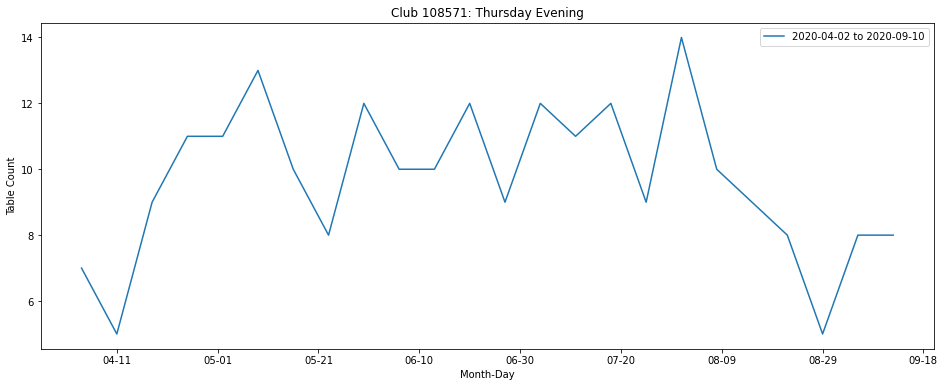

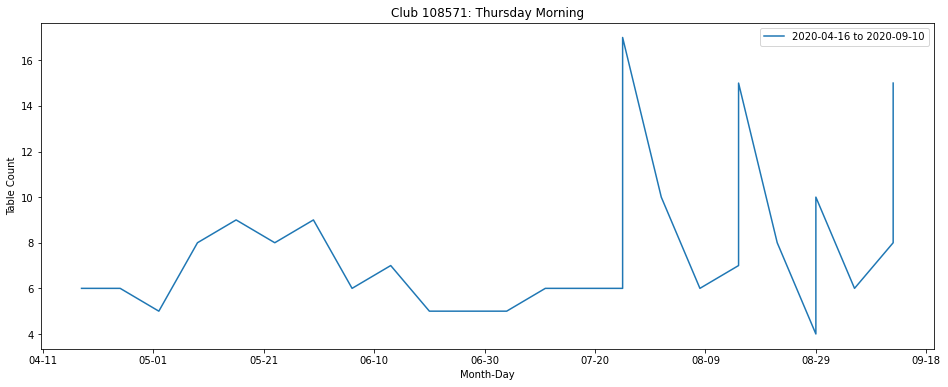

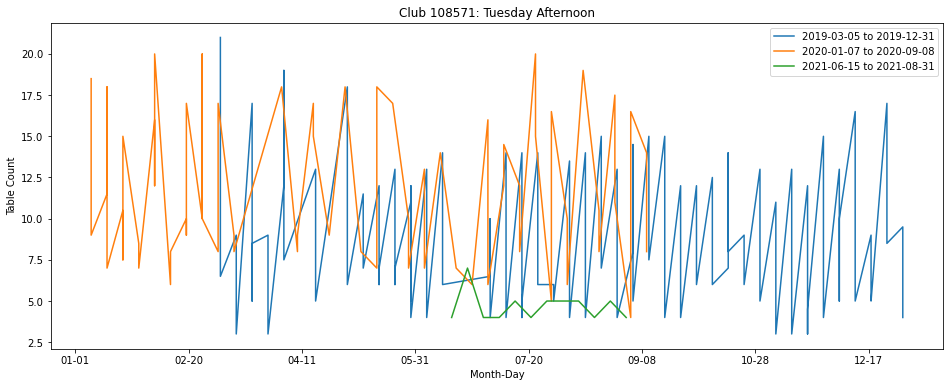

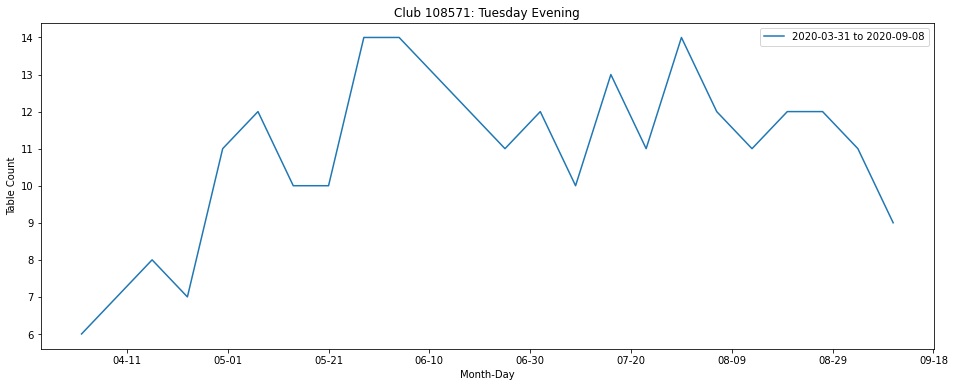

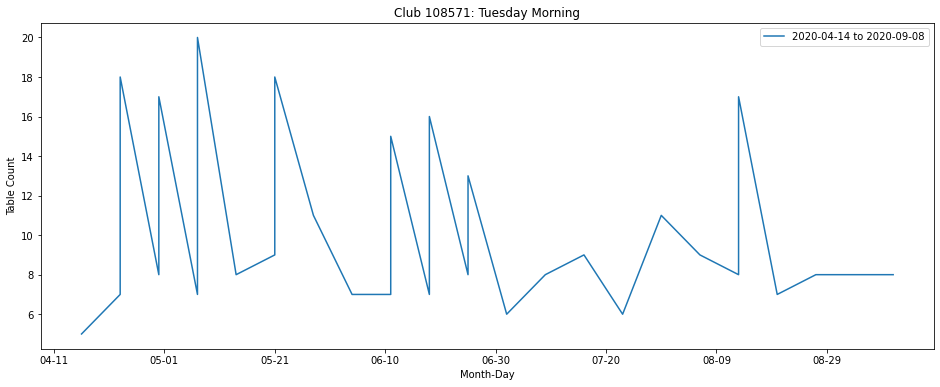

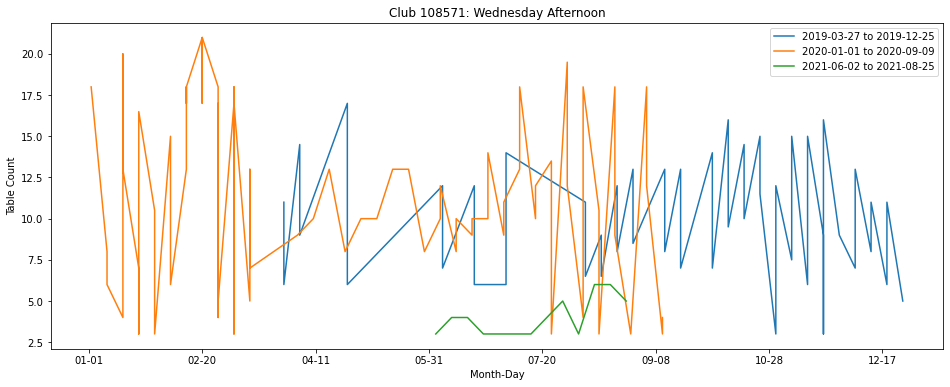

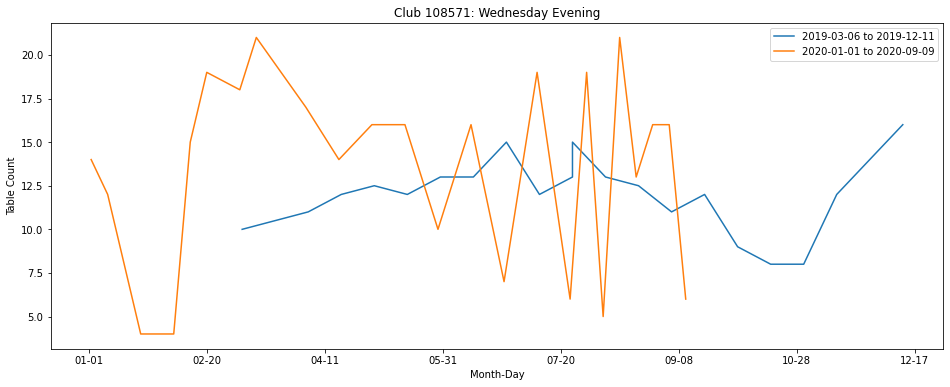

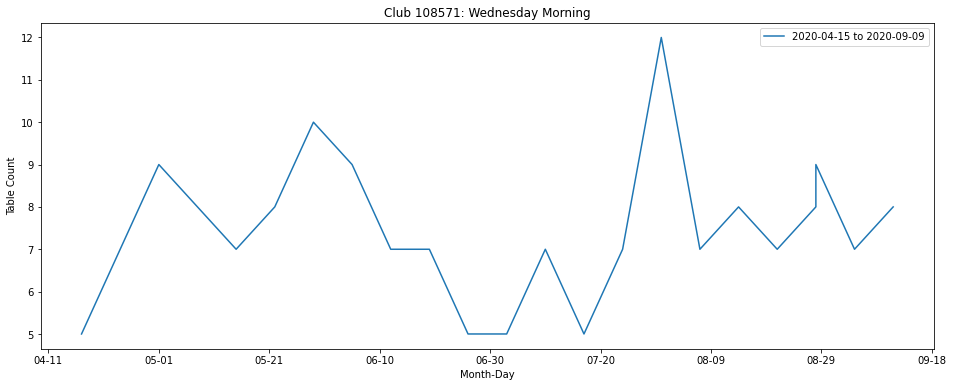

In [17]:
clubs = [108571] # [267096] # select club numbers
cing = df_events.groupby('club_id_number')
for cing_key,cing_df in cing:
    if cing_key not in clubs: # continue if club number is not in list
        continue
    #display(cing_key, len(cing_df), cing_df.head())
    eg = cing_df.groupby('club_session')
    for eg_key, eg_df in eg:
        #display(eg_key, len(eg_df), eg_df.head())
        if len(eg_df) < 10: # skip events with too few dates
            continue
        fig, ax = plt.subplots(figsize=(16,6))
        ax.set(xlabel='Month-Day',ylabel='Table Count',title='Club '+str(cing_key)+': '+eg_key)
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d')) # show month-day for x-axis.
        for year in [2019,2020,2021]:
            row_filter = ~eg_df['olExists'] & eg_df['start_date'].dt.year.eq(year)
            if len(eg_df[row_filter]) == 0: # filter out years with no events
                continue
            #eg_df[row_filter].pivot(index='start_date', columns='club_session', values='tb_count')
            #ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)
            #days = eg_df[row_filter]['start_date'].dt.strftime('%m-%d').sort_values() #.dt.month.sort_values()
            days = eg_df[row_filter]['start_date'].dt.dayofyear.sort_values() # can't figure out indexing unless julian.
            tables = eg_df[row_filter]['tb_count']
            min_date = eg_df[row_filter]['start_date'].min().strftime('%Y-%m-%d')
            max_date = eg_df[row_filter]['start_date'].max().strftime('%Y-%m-%d')
            plt.plot(days,tables,label=min_date+' to '+max_date)
        plt.legend()